## Load and Prepare the Dataset


In [1]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Determine whether any of the columns in the dataset are missing values.

In [2]:
import sklearn
import seaborn as sns

print(sklearn.__version__)

print(sns.__version__)


print(pd.__version__)

1.5.2
0.13.2
2.2.2


In [3]:
import sys
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [4]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


Filter the dataset to remove columns that won't be used, one-hot-encode the "Sex" and "Pclass" columns, and remove rows with missing values.

In [5]:
df = df[['Survived', 'Age', 'Sex', 'Pclass']]
df = pd.get_dummies(df, columns=['Sex', 'Pclass'])
df.dropna(inplace=True)
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,False,True,False,False,True
1,1,38.0,True,False,True,False,False
2,1,26.0,True,False,False,False,True
3,1,35.0,True,False,True,False,False
4,0,35.0,False,True,False,False,True


In [6]:
df

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,False,True,False,False,True
1,1,38.0,True,False,True,False,False
2,1,26.0,True,False,False,False,True
3,1,35.0,True,False,True,False,False
4,0,35.0,False,True,False,False,True
...,...,...,...,...,...,...,...
885,0,39.0,True,False,False,False,True
886,0,27.0,False,True,False,True,False
887,1,19.0,True,False,True,False,False
889,1,26.0,False,True,True,False,False


The next step is to split the data into two datasets: one for training and one for testing. We'll use a stratified split to create a balanced distribution of samples in the training dataset and the testing dataset.

In [7]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [8]:
x_train2, x_vali, y_train2, y_vali = train_test_split(x_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

In [9]:
x_train2.shape #Training data

(428, 6)

In [10]:
x_vali.shape #Validation data

(143, 6)

In [11]:
x_test.shape #Test data

(143, 6)

## Build Model


In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train2, y_train2)

LogisticRegression(random_state=0)

# Model Evaluation

Get an accuracy score.

In [13]:
model.score(x_train2, y_train2)

0.7757009345794392

In [14]:
model.score(x_vali, y_vali)

0.7972027972027972

In [15]:
model.score(x_test, y_test)

0.8391608391608392

Correlation matrix

In [16]:
import seaborn as sns

<Axes: >

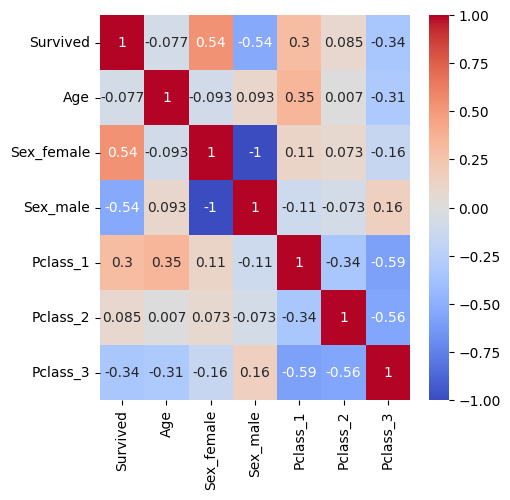

In [18]:
import matplotlib.pyplot as plt
map = df.corr()
mask = df.isna()
plt.figure(figsize=(5,5))
sns.heatmap(map, cmap ='coolwarm', annot=True)

Trainig Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix

y_predicted_train = model.predict(x_train2)
cm_train =confusion_matrix(y_train2, y_predicted_train)
labels = ['Died', 'Survived']

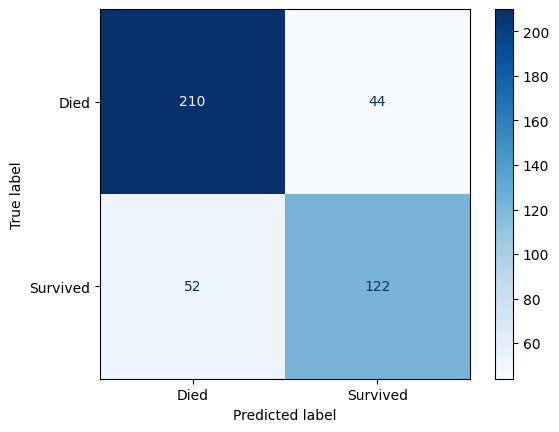

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
#matrix = confusion_matrix()

#d = confusion_matrix(model, x_test, y_test, display_labels=['Perished', 'Survived'], cmap='Blues', xticks_rotation='vertical')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels= labels)
disp.plot(cmap =plt.cm.Blues)
plt.show()

Print a classification report to view precision, recall, and other metrics.

Validation Confison Matrix

In [21]:
from sklearn.metrics import confusion_matrix

y_predicted_vali = model.predict(x_vali)
cm_vali =confusion_matrix(y_vali, y_predicted_vali)
labels = ['Died', 'Survived']

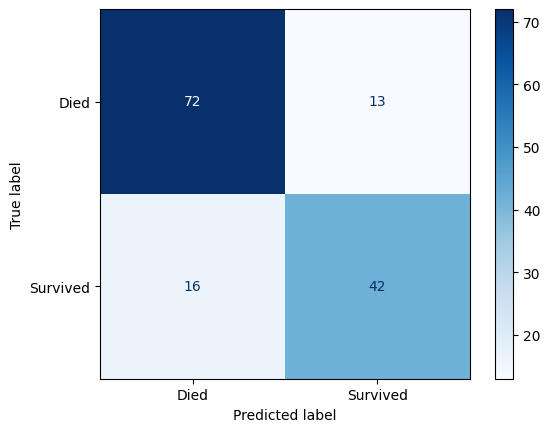

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
#matrix = confusion_matrix()

#d = confusion_matrix(model, x_test, y_test, display_labels=['Perished', 'Survived'], cmap='Blues', xticks_rotation='vertical')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_vali, display_labels= labels)
disp.plot(cmap =plt.cm.Blues)
plt.show()

Test Confusion
Matrix

In [23]:
from sklearn.metrics import confusion_matrix

y_predicted_test = model.predict(x_test)
cm_test =confusion_matrix(y_test, y_predicted_test)
labels = ['Died', 'Survived']

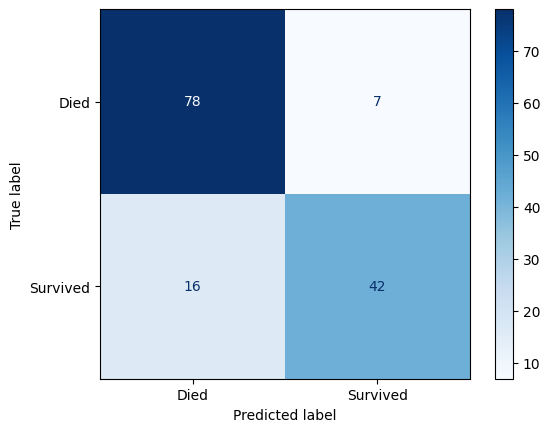

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
#matrix = confusion_matrix()

#d = confusion_matrix(model, x_test, y_test, display_labels=['Perished', 'Survived'], cmap='Blues', xticks_rotation='vertical')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels= labels)
disp.plot(cmap =plt.cm.Blues)
plt.show()

# Pre Processing For AIR and AUC Calculations


Appending Predctions to Data Table

In [25]:
x_test

,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
165,9.0,False,True,False,False,True
360,40.0,False,True,False,False,True
137,37.0,False,True,True,False,False
84,17.0,True,False,False,True,False
366,60.0,True,False,True,False,False
...,...,...,...,...,...,...
331,45.5,False,True,True,False,False
853,16.0,True,False,True,False,False
86,16.0,False,True,False,False,True
759,33.0,True,False,True,False,False


In [26]:
y_hat_test = pd.DataFrame(y_predicted_test).rename(columns ={0: 'Predicted'})
y_hat_test

,Predicted
0,0
1,0
2,0
3,1
4,1
...,...
138,0
139,1
140,0
141,1


In [27]:
y_test2 = y_test.reset_index().drop(columns = 'index')

In [28]:
actual_and_preds = pd.merge(y_test2, y_hat_test, left_index = True, right_index = True)
actual_and_preds

,Survived,Predicted
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
138,0,0
139,1,1
140,0,0
141,1,1


In [29]:
x_test2 = x_test.reset_index().drop(columns = 'index')

In [30]:
df_for_aic = pd.merge(actual_and_preds, x_test2, left_index = True, right_index = True)
df_for_aic

,Survived,Predicted,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,9.0,False,True,False,False,True
1,0,0,40.0,False,True,False,False,True
2,0,0,37.0,False,True,True,False,False
3,1,1,17.0,True,False,False,True,False
4,1,1,60.0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
138,0,0,45.5,False,True,True,False,False
139,1,1,16.0,True,False,True,False,False
140,0,0,16.0,False,True,False,False,True
141,1,1,33.0,True,False,True,False,False


Acceptance Rate First Class Pre Processing

In [31]:
first_class = df_for_aic.loc[df_for_aic['Pclass_1'] == True] #DF of women

In [32]:
first_class.shape

(34, 8)

In [33]:
first_class.loc[(first_class['Predicted'] == 1)].shape #Acceptance rate for first class is 18/34

(18, 8)

Acceptance Rate Second Class Pre Processing

In [34]:
second_class = df_for_aic.loc[df_for_aic['Pclass_2'] == True] #DF of women

In [35]:
second_class.shape

(33, 8)

In [36]:
second_class.loc[(second_class['Predicted'] == 1)].shape #Acceptance rate for second class is 15/33

(15, 8)

Acceptance Rate Third Class Pre Processing

In [37]:
third_class = df_for_aic.loc[df_for_aic['Pclass_3'] == True] #DF of women

In [38]:
third_class.shape

(76, 8)

In [39]:
third_class.loc[(third_class['Predicted'] == 1)].shape #Acceptance rate for second class is 16/76

(16, 8)

# Calculations of AIR and AUC

Calculations for AIR

In [40]:
#first class acceptance rate
accept_first = 18/34
accept_first

0.5294117647058824

In [41]:
#Second class acceptance rate
accept_second = 15/33
accept_second

0.45454545454545453

In [42]:
#Third class acceptance rate
accept_third = 16/76
accept_third

0.21052631578947367

In [43]:
#AIR of second class compared to first class
AIR_second_to_first = accept_second/accept_first
AIR_second_to_first

0.8585858585858586

In [44]:
#AIR of second class compared to first class
AIR_third_to_first = accept_third/accept_first
AIR_third_to_first

0.39766081871345027

AUC Calculations

In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
#AUc for training data
auc_train = roc_auc_score(y_train2, y_predicted_train)
auc_train

0.7639605394153317

In [47]:
#AUC for valid data
auc_vali = roc_auc_score(y_vali, y_predicted_vali)
auc_vali

0.7855983772819473

In [48]:
#AUC for test data
auc_test = roc_auc_score(y_test, y_predicted_test)
auc_test

0.8208924949290061